# Analysis of the spike proteins in sars-cov-2

## Mutations in the spike protein

Since most of the vaccines developed against covid-19 seem to be targeting on the spike protein, I will be analyzing the mutations in them to see if the vaccine would work in the long term.

I have collected all my data from NCBI https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/ and have also used their multiple alignment to align the spike protein sequences.

In [2]:
import pandas as pd
#I will be using the following surface protein sequences (contains the spike proteins)
spikeProteins = pd.read_csv("sars-cov-2_sprotein.csv").sort_values("Collection_Date")
spikeProteins

,Accession,Release_Date,Species,Length,Geo_Location,Host,Isolation_Source,Collection_Date
3,QIU81813,2020-04-06T00:00:00Z,Severe acute respiratory syndrome-related coro...,1273,China: Wuhan,Homo sapiens,lung,2019-12-30
5,QHN73810,2020-01-24T00:00:00Z,Severe acute respiratory syndrome-related coro...,1273,China,Homo sapiens,"lung, oronasopharynx",2020-01-11
4,QID21068,2020-02-24T00:00:00Z,Severe acute respiratory syndrome-related coro...,1273,USA: TX,Homo sapiens,"lung, oronasopharynx",2020-02-11
0,QKG88526,2020-06-04T00:00:00Z,Severe acute respiratory syndrome-related coro...,1273,USA: Massachusetts,Homo sapiens,oronasopharynx,2020-03-13
1,QKE45668,2020-05-28T00:00:00Z,Severe acute respiratory syndrome-related coro...,1273,USA: CA,Homo sapiens,NaN,2020-04-14
2,QJX44550,2020-05-20T00:00:00Z,Severe acute respiratory syndrome-related coro...,1273,India: Ahmedabad,Homo sapiens,NaN,2020-05-05


I will be calculating the mutation score as the change in protein type in the multiple alignment of the sequences that is
mutation = mismatches between two protein sequences after alignment
where mismatches are substitution, insertion or deletion of a protein type.

In [3]:
#mismatches takes in two virus sequence and finds the total mismatches
def mismatches(seq1, seq2):
    miss = 0
    for i in range(len(seq1)):
        if seq1[i] != seq2[i]:
            miss += 1
        if seq1[i] == "-" and seq2[i] == "-":
            miss += 1
    return miss

#data preprocessing 

#matches the sequence name in the downloaded file to the give sequence name
def findSeq(query, seqNames):
    for i in seqNames:
        if query.find(i) > 0:
            return i
    print("no such sequence found")

#takes in a file with .aln and and cleans up the sequences to strings
def getMutationScores(filename, seqNames):
    file = open(filename, 'r')
    str1 = ""
    cleanSeqs = {}
    for i in file:
        str1 += i
    seqData = str1.strip().split('>')
    seqData = seqData[1:]
    for seq in seqData:
        seqStr = seq.strip().split("\n")
        cleanSeqs[findSeq(seqStr[0], seqNames)] = ("".join(seqStr[1:]))
        #print(len(cleanSeqs[findSeq(seqStr[0], seqNames)]))
    mismatchScores = []
    for i in range(len(seqNames)-1):
        mismatchScores.append(mismatches(
            cleanSeqs[seqNames[i]], cleanSeqs[seqNames[i+1]]))
    return([0] + mismatchScores)

In [4]:
sars_cov_2_scores = getMutationScores("sars-cov-2_Sprotein.aln",spikeProteins['Accession'])

In [5]:
S_protein_mutation = pd.DataFrame(spikeProteins['Accession'],columns = ["Accession"])
S_protein_mutation['Mutations'] = sars_cov_2_scores
S_protein_mutation['date'] = spikeProteins['Collection_Date']
S_protein_mutation                                                                   

,Accession,Mutations,date
3,QIU81813,0,2019-12-30
5,QHN73810,3,2020-01-11
4,QID21068,3,2020-02-11
0,QKG88526,1,2020-03-13
1,QKE45668,0,2020-04-14
2,QJX44550,0,2020-05-05


In [6]:
import matplotlib.pyplot as plt
plt.plot(S_protein_mutation['date'],S_protein_mutation['Mutations'])
plt.title("Mutations in the surface protein of Covid-19 year 2020")
plt.xlabel("dates")
plt.ylabel("mutation score - change in codons")

Text(0,0.5,'mutation score - change in codons')

I was surprised that there was very little mutation because from my previous study on the mutation rates of sars-cov-2(the whole genome), the average was around 300 nucleotides per month but in the surface protein the peak mutation rate seems to be around 9 nucleotides. (note I am using protein codons in sequencing.)

Just to show the comparision of the low mutation rate I will be comparing it with the mutation rate in HIV virus's envelope protein.

In [7]:
hiv = pd.read_csv("HIV.csv").sort_values("Collection_Date")
hiv

,Accession,Release_Date,Species,Length,Geo_Location,Host,Isolation_Source,Collection_Date
0,QDG08607,2019-07-03T00:00:00Z,Human immunodeficiency virus 1,661,France,Homo sapiens,NaN,2015-01-20
2,QDG08857,2019-07-03T00:00:00Z,Human immunodeficiency virus 1,697,France,Homo sapiens,NaN,2015-03-25
3,QDG08874,2019-07-03T00:00:00Z,Human immunodeficiency virus 1,701,France,Homo sapiens,NaN,2015-04-14
1,QDG08619,2019-07-03T00:00:00Z,Human immunodeficiency virus 1,661,France,Homo sapiens,NaN,2015-06-25
4,QDG08944,2019-07-03T00:00:00Z,Human immunodeficiency virus 1,707,France,Homo sapiens,NaN,2015-08-28
5,QDG08946,2019-07-03T00:00:00Z,Human immunodeficiency virus 1,709,France,Homo sapiens,NaN,2015-09-29


In [8]:
hiv_scores = getMutationScores("HIV.aln",hiv['Accession'])
hiv_mutation = pd.DataFrame(hiv['Accession'],columns = ["Accession"])
hiv_mutation['mutation scores'] = hiv_scores
hiv_mutation['date'] = hiv["Collection_Date"]
hiv_mutation

,Accession,mutation scores,date
0,QDG08607,0,2015-01-20
2,QDG08857,205,2015-03-25
3,QDG08874,269,2015-04-14
1,QDG08619,193,2015-06-25
4,QDG08944,206,2015-08-28
5,QDG08946,182,2015-09-29


Text(0,0.5,'mutation score - change in codons')

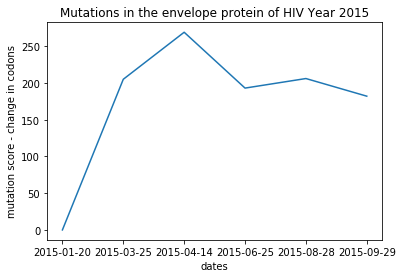

In [9]:
plt.plot(hiv_mutation['date'],hiv_mutation['mutation scores'])
plt.title("Mutations in the envelope protein of HIV Year 2015")
plt.xlabel("dates")
plt.ylabel("mutation score - change in codons")

The mutation rates in the HIV envelope glycoprotein are very high compared to the spike proteins in SARS-cov-2. It makes sense why it is very hard to make a vaccine for HIV since the mutation rates seem to be very high. On the other hand looking at the spike proteins in SARS-COV-2, I can see why the vaccines seem to target the spike proteins because if its very low mutation rates.

## Comapring the spike proteins between two Coronaviruses

I came across an interesting article onb how SARS antibody's seem to be working on covid-19 as the antibodies seem to neutralize the spike proteins. 
https://www.nature.com/articles/s41586-020-2349-y

the the above article inspired me to analyze the spike proteins between SARS and Sars-Cov-2.
I have used NCBI again to obtain the data of these protiens - 

>QKE61636.1 |surface glycoprotein [Severe acute respiratory syndrome coronavirus 2]
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFS
NVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIV
NNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLE
GKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQT
LLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETK
CTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISN
CVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIAD
YNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPC
NGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVN
FNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITP
GTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSY
ECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTI
SVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQE
VFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDC
LGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAM
QMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALN
TLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRA
SANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPA
ICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDP
LQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDL
QELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCCSCGSCCKFDEDD
SEPVLKGVKLHYT
>P59594.1 |RecName: Full=Spike glycoprotein; Short=S glycoprotein; AltName: Full=E2; AltName: Full=Peplomer protein; Contains: RecName: Full=Spike protein S1; Contains: RecName: Full=Spike protein S2; Contains: RecName: Full=Spike protein S2'; Flags: Precursor
MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEIFRSDTLYLTQDLFL
PFYSNVTGFHTINHTFGNPVIPFKDGIYFAATEKSNVVRGWVFGSTMNNKSQSVIIINNS
TNVVIRACNFELCDNPFFAVSKPMGTQTHTMIFDNAFNCTFEYISDAFSLDVSEKSGNFK
HLREFVFKNKDGFLYVYKGYQPIDVVRDLPSGFNTLKPIFKLPLGINITNFRAILTAFSP
AQDIWGTSAAAYFVGYLKPTTFMLKYDENGTITDAVDCSQNPLAELKCSVKSFEIDKGIY
QTSNFRVVPSGDVVRFPNITNLCPFGEVFNATKFPSVYAWERKKISNCVADYSVLYNSTF
FSTFKCYGVSATKLNDLCFSNVYADSFVVKGDDVRQIAPGQTGVIADYNYKLPDDFMGCV
LAWNTRNIDATSTGNYNYKYRYLRHGKLRPFERDISNVPFSPDGKPCTPPALNCYWPLND
YGFYTTTGIGYQPYRVVVLSFELLNAPATVCGPKLSTDLIKNQCVNFNFNGLTGTGVLTP
SSKRFQPFQQFGRDVSDFTDSVRDPKTSEILDISPCSFGGVSVITPGTNASSEVAVLYQD
VNCTDVSTAIHADQLTPAWRIYSTGNNVFQTQAGCLIGAEHVDTSYECDIPIGAGICASY
HTVSLLRSTSQKSIVAYTMSLGADSSIAYSNNTIAIPTNFSISITTEVMPVSMAKTSVDC
NMYICGDSTECANLLLQYGSFCTQLNRALSGIAAEQDRNTREVFAQVKQMYKTPTLKYFG
GFNFSQILPDPLKPTKRSFIEDLLFNKVTLADAGFMKQYGECLGDINARDLICAQKFNGL
TVLPPLLTDDMIAAYTAALVSGTATAGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYE
NQKQIANQFNKAISQIQESLTTTSTALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLN
DILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSK
RVDFCGKGYHLMSFPQAAPHGVVFLHVTYVPSQERNFTTAPAICHEGKAYFPREGVFVFN
GTSWFITQRNFFSPQIITTDNTFVSGNCDVVIGIINNTVYDPLQPELDSFKEELDKYFKN
HTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYVWL
GFIAGLIAIVMVTILLCCMTSCCSCLKGACSCGSCCKFDEDDSEPVLKGVKLHYT

In [10]:
#data preprocessing
file = open("sars12.fasta","r")
content = ""
for line in file:
    content += line
seqs = content.split(">")
seq1,seq2 = seqs[1],seqs[2]
SARS_COV2_seq = "".join(seq1.strip().split("\n")[1:])
SARS_seq = "".join(seq2.strip().split("\n")[1:])

In [11]:
uniqueProteins = []
for i in SARS_COV2_seq:
    if i not in uniqueProteins:
        uniqueProteins.append(i)
for i in SARS_seq:
    if i not in uniqueProteins:
        uniqueProteins.append(i)
uniqueProteins.sort()

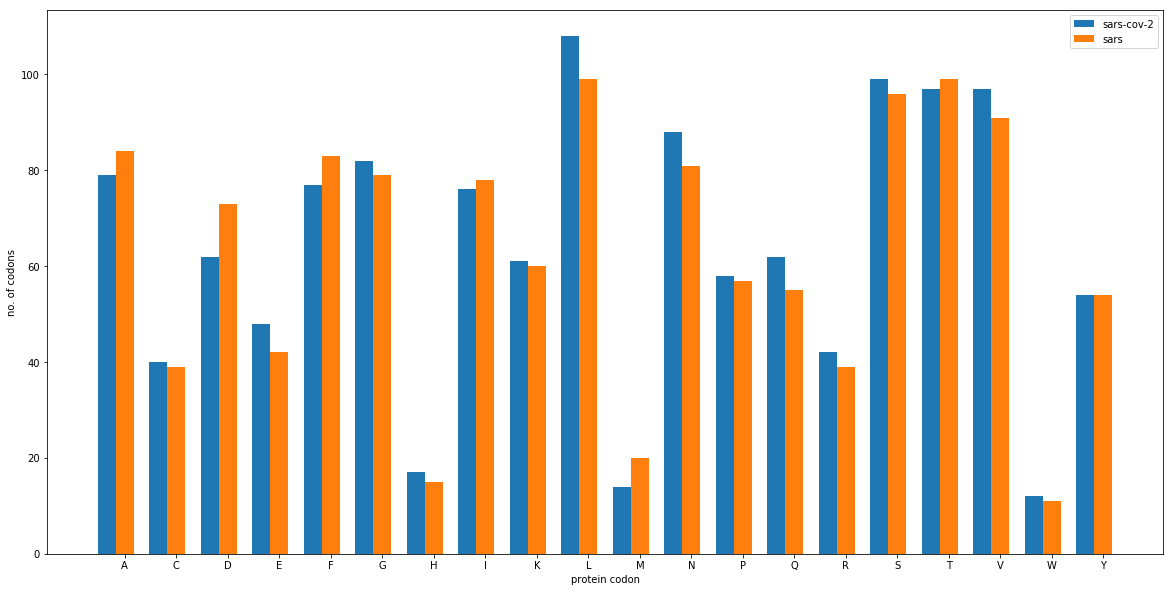

In [14]:
import numpy as np
proteinCount_SARS_Cov_2 = {}
proteinCount_SARS = {}
for i in uniqueProteins:
    proteinCount_SARS_Cov_2[i] = 0
for i in uniqueProteins:
    proteinCount_SARS[i] = 0
for i in SARS_COV2_seq:
     proteinCount_SARS_Cov_2[i] += 1
for i in SARS_seq:
     proteinCount_SARS[i] += 1

x = np.arange(20)
fig, ax = plt.subplots(figsize=(20,10))
w = 0.35
ax.bar(x,proteinCount_SARS_Cov_2.values(),label='sars-cov-2',width=w)
ax.bar(x+w,proteinCount_SARS.values(),label='sars',width = w)
plt.xticks(x + w, uniqueProteins)
plt.ylabel("no. of codons")
plt.xlabel("protein codon")
plt.legend()
plt.show()

The composition of proteins between them seem pretty similar but wasn't able to able to factor in the order of sequence which is an important factor in comparing to genomes.
(Not sure how to compare sequences of different viruses other than looking at composition)